In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import seaborn as sns

In [2]:
trainData = pd.read_csv("temperatures.csv")

In [3]:
trainData.dtypes
trainData.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

<AxesSubplot:title={'center':'Top 10 temperature records'}, xlabel='YEAR', ylabel='ANNUAL'>

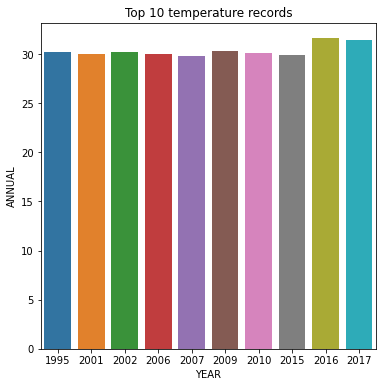

In [4]:
top_10_data = trainData.nlargest(10, "ANNUAL")
plt.figure(figsize=(6,6))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10_data.YEAR, y=top_10_data.ANNUAL)

In [5]:
from sklearn import linear_model, metrics

In [6]:
X=trainData[["YEAR"]]
Y=trainData[["JAN"]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [8]:
reg = linear_model.LinearRegression()

In [9]:
model = reg.fit(X_train, Y_train)

In [10]:
r_sq = reg.score(X_train, Y_train)
print("Determination coefficient:", r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Determination coefficient: 0.36307306982386045
Intercept: [-5.54042484]
Slope: [[0.01491454]]


In [11]:
Y_pred = model.predict(X_test)
print('predicted response:', Y_pred, sep='\n')

predicted response:
[[23.48327571]
 [24.22900286]
 [23.64733569]
 [24.06494289]
 [24.27374649]
 [23.42361754]
 [24.00528472]
 [24.42289192]
 [23.52801934]
 [22.84195037]
 [23.60259206]
 [23.58767751]
 [24.452721  ]
 [23.45344663]
 [23.99037017]
 [22.82703582]
 [22.96126671]
 [23.33413028]
 [23.5131048 ]
 [23.1998994 ]
 [23.8263102 ]
 [24.02019926]
 [23.36395937]
 [23.0954976 ]]


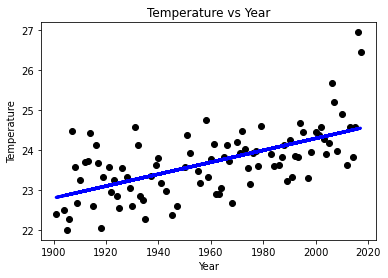

In [12]:
plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train, reg.predict(X_train), color='blue', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

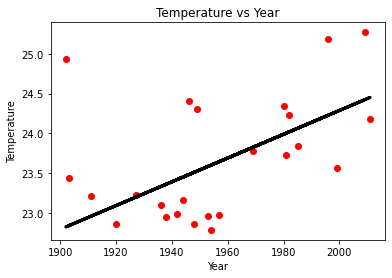

In [13]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, reg.predict(X_test), color='black', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [14]:
mse = np.sum((Y_pred - Y_test)**2) # mean squared error (MSE)
rmse = np.sqrt(mse/24) # root mean squared error (RMSE)
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)

Mean Squared Error(MSE): JAN    11.270382
dtype: float64
Root Mean Squared Error(RMSE): JAN    0.685273
dtype: float64


In [15]:
SSR = np.sum((Y_pred - Y_test)**2) #Sum of square of Residuals/Errors SSR/SSE
SST = np.sum((Y_test - np.mean(Y_test))**2) # total sum of squares
r2_score = 1 - (SSR/SST) # R2 score
print('SST:', SST)
print('SSR', SSR)
print('R2 square:', r2_score)

SST: JAN    13.511862
dtype: float64
SSR JAN    11.270382
dtype: float64
R2 square: JAN    0.16589
dtype: float64
